<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/FinMA_7B_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

Mon Jun 26 06:29:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    42W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

* https://huggingface.co/datasets/ChanceFocus/FLUPE/viewer/ChanceFocus--FLUPE/train?row=123008

## FinMA-7B-full
FinMA-7B-full is a comprehensive financial large language model (LLM) developed as part of the PIXIU project. It is designed to understand complex financial language and concepts, and is fine-tuned to follow natural language instructions, enhancing its performance in downstream financial tasks. Specifically, FinMA-7B-full is trained with the full instruction data from the PIXIU dataset, covering both NLP and prediction tasks. This makes it a more comprehensive model capable of handling a wider range of financial tasks.

##Other Models in the PIXIU Project
In addition to FinMA-7B-full, the PIXIU project includes two other models: FinMA-7B-NLP and FinMA-30B.

FinMA-7B-NLP: This model is trained only on the NLP tasks of the PIXIU dataset, making it specialized for tasks such as sentiment analysis, news headline classification, named entity recognition, and question answering.

FinMA-30B: This model is a larger version of FinMA, fine-tuned on the LLaMA-30B model. Like FinMA-7B-NLP, it is trained with the NLP instruction data.

In [2]:
!pip install -qU pip

In [3]:
!pip install -qU sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.1 MB/s eta 0:00:00


In [4]:
!pip install -U git+https://github.com/huggingface/transformers@de9255de27abfcae4a1f816b904915f0b1e23cd9
!pip install -qU einops
!pip install -qU bitsandbytes --progress-bar off
!pip install -qU git+https://github.com/huggingface/peft
!pip install git+https://github.com/huggingface/accelerate
!pip install -qqq datasets==2.12.0
!pip install -qqq -U loralib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers (to revision de9255de27abfcae4a1f816b904915f0b1e23cd9) to /tmp/pip-req-build-3600rwv9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-3600rwv9
  Running command git rev-parse -q --verify 'sha^de9255de27abfcae4a1f816b904915f0b1e23cd9'
  Running command git fetch -q https://github.com/huggingface/transformers de9255de27abfcae4a1f816b904915f0b1e23cd9
  Running command git checkout -q de9255de27abfcae4a1f816b904915f0b1e23cd9
  Resolved https://github.com/huggingface/transformers to commit de9255de27abfcae4a1f816b904915f0b1e23cd9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
!pip install -qU transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 84.5 MB/s eta 0:00:00


In [6]:
from transformers import LlamaTokenizer, LlamaForCausalLM,AutoConfig, AutoTokenizer, BitsAndBytesConfig,AutoModelForCausalLM
import torch
import gc


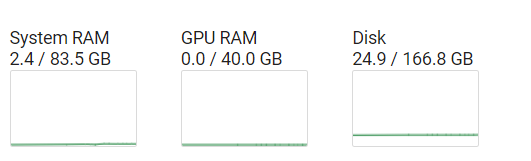

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [7]:
model_name="ChanceFocus/finma-7b-full"
config = AutoConfig.from_pretrained(model_name, trust_remote_code=True)
model = LlamaForCausalLM.from_pretrained(model_name,
                                                quantization_config=BitsAndBytesConfig(load_in_4bit=True),
                                                trust_remote_code=True,
                                                load_in_4bit=True,
                                                #torch_dtype=torch.bfloat16, # additional option to lower RAM consumtion
                                                #device_map={"": 0}
                                                 device_map="auto")

tokenizer = LlamaTokenizer.from_pretrained("ChanceFocus/finma-7b-full")

The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('http'), PosixPath('//172.28.0.1'), PosixPath('8013')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//colab.research.google.com/tun/m/cc483011

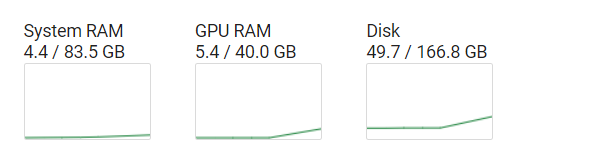

In [15]:
context  ="""What sentiment is conveyed in the provided sentence from a financial news report? Your options are positive, negative, or neutral. As an illustration, 'The company's recent investment in renewable energy has yielded impressive returns.' would be labeled as positive.
New product launches in Finland will more than double from 2005 .
###Response:
"""

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
input_ids = tokenizer(context, return_tensors="pt").input_ids.to(device)
outputs = model.generate(input_ids, max_length=500)

In [17]:
response = tokenizer.decode(outputs[0])
print(response)

 ⁇  What sentiment is conveyed in the provided sentence from a financial news report? Your options are positive, negative, or neutral. As an illustration, 'The company's recent investment in renewable energy has yielded impressive returns.' would be labeled as positive.
New product launches in Finland will more than double from 2005 .
###Response:
 positive


In [18]:
context = """In the context of this series of interconnected finance-related queries and the additional information provided by the pretext, table data, and posttext from a company's financial filings, please provide a response to the final question. This may require extracting information from the context and performing mathematical calculations. Please take into account the information provided in the preceding questions and their answers when formulating your response:\nContext: for purposes of determining entergy corporation's relative performance for the 2006-2008 period , the committee used the philadelphia utility index as the peer group . based on market data and the recommendation of management , the committee compared entergy corporation's total shareholder return against the total shareholder return of the companies that comprised the philadelphia utility index . based on a comparison of entergy corporation's performance relative to the philadelphia utility index as described above , the committee concluded that entergy corporation had exceeded the performance targets for the 2006-2008 performance cycle with entergy finishing in the first quartile which resulted in a payment of 250% ( 250 % ) of target ( the maximum amount payable ) . each performance unit was then automatically converted into cash at the rate of $ 83.13 per unit , the closing price of entergy corporation common stock on the last trading day of the performance cycle ( december 31 , 2008 ) , plus dividend equivalents accrued over the three-year performance cycle . see the 2008 option exercises and stock vested table for the amount paid to each of the named executive officers for the 2006-2008 performance unit cycle . stock options the personnel committee and in the case of the named executive officers ( other than mr . leonard , mr . denault and mr . smith ) , entergy's chief executive officer and the named executive officer's supervisor consider several factors in determining the amount of stock options it will grant under entergy's equity ownership plans to the named executive officers , including : individual performance ; prevailing market practice in stock option grants ; the targeted long-term value created by the use of stock options ; the number of participants eligible for stock options , and the resulting \"burn rate\" ( i.e. , the number of stock options authorized divided by the total number of shares outstanding ) to assess the potential dilutive effect ; and the committee's assessment of other elements of compensation provided to the named executive officer for stock option awards to the named executive officers ( other than mr . leonard ) , the committee's assessment of individual performance of each named executive officer done in consultation with entergy corporation's chief executive officer is the most important factor in determining the number of options awarded . the following table sets forth the number of stock options granted to each named executive officer in 2008 . the exercise price for each option was $ 108.20 , which was the closing fair market value of entergy corporation common stock on the date of grant. . <table class='wikitable'><tr><td>1</td><td>named exeutive officer</td><td>stock options</td></tr><tr><td>2</td><td>j . wayne leonard</td><td>175000</td></tr><tr><td>3</td><td>leo p . denault</td><td>50000</td></tr><tr><td>4</td><td>richard j . smith</td><td>35000</td></tr><tr><td>5</td><td>e . renae conley</td><td>15600</td></tr><tr><td>6</td><td>hugh t . mcdonald</td><td>7000</td></tr><tr><td>7</td><td>haley fisackerly</td><td>5000</td></tr><tr><td>8</td><td>joseph f . domino</td><td>7000</td></tr><tr><td>9</td><td>roderick k . west</td><td>8000</td></tr><tr><td>10</td><td>theodore h . bunting jr .</td><td>18000</td></tr><tr><td>11</td><td>carolyn shanks</td><td>7000</td></tr></table> the option grants awarded to the named executive officers ( other than mr . leonard and mr . lewis ) ranged in amount between 5000 and 50000 shares . mr . lewis did not receive any stock option awards in 2008 . in the case of mr . leonard , who received 175000 stock options , the committee took special note of his performance as entergy corporation's chief executive officer . among other things , the committee noted that .\nQuestion: what is the sum of stock options for leo p. denault by the exercise price?
Answer:"""

In [19]:
context

'In the context of this series of interconnected finance-related queries and the additional information provided by the pretext, table data, and posttext from a company\'s financial filings, please provide a response to the final question. This may require extracting information from the context and performing mathematical calculations. Please take into account the information provided in the preceding questions and their answers when formulating your response:\nContext: for purposes of determining entergy corporation\'s relative performance for the 2006-2008 period , the committee used the philadelphia utility index as the peer group . based on market data and the recommendation of management , the committee compared entergy corporation\'s total shareholder return against the total shareholder return of the companies that comprised the philadelphia utility index . based on a comparison of entergy corporation\'s performance relative to the philadelphia utility index as described above 

In [21]:
%%time
input_ids = tokenizer(context, return_tensors="pt").input_ids.to(device)
outputs = model.generate(input_ids, max_length=2000)
response = tokenizer.decode(outputs[0])
print(response)

 ⁇  In the context of this series of interconnected finance-related queries and the additional information provided by the pretext, table data, and posttext from a company's financial filings, please provide a response to the final question. This may require extracting information from the context and performing mathematical calculations. Please take into account the information provided in the preceding questions and their answers when formulating your response:
Context: for purposes of determining entergy corporation's relative performance for the 2006-2008 period , the committee used the philadelphia utility index as the peer group . based on market data and the recommendation of management , the committee compared entergy corporation's total shareholder return against the total shareholder return of the companies that comprised the philadelphia utility index . based on a comparison of entergy corporation's performance relative to the philadelphia utility index as described above , 